# Data Science with Python — Real World Project

In [3]:
#Import Library Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
import os
os.getcwd()

'C:\\Users\\PPP\\prethesh\\py'

**	Data acquisition of the movielens dataset**

In [7]:
#Import the three datasets  *users *ratings *movies
users=pd.read_csv("C:\\Users\\PPP\\prethesh\\py\\users.dat",sep='::', engine='python')
ratings=pd.read_csv("C:\\Users\\PPP\\prethesh\\py\\ratings.dat",sep='::', engine='python')
movies=pd.read_csv("C:\\Users\\PPP\\prethesh\\py\\movies.dat",sep='::', engine='python')

In [11]:
users.head(2)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072


In [10]:
ratings.head(2)

,UserID,MovieID,Rating,Timestamp
0,1,Toy Story (1995),5,978300760
1,1,661,3,978302109


In [13]:
movies.head(2)

,num,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


**	Perform the Exploratory Data Analysis (EDA) for the users dataset**

In [15]:
#•	Visualize user age distribution
users.groupby('Age')['UserID'].count()

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
Name: UserID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

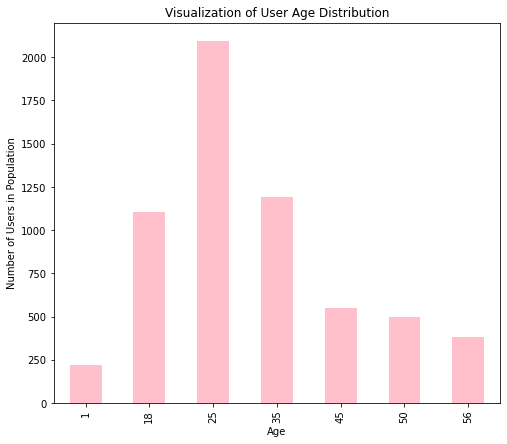

In [17]:
users.groupby('Age')['UserID'].count().plot(kind = 'bar', color = 'pink',figsize = (8,7))
plt.xlabel('Age')
plt.ylabel('Number of Users in Population')
plt.title('Visualization of User Age Distribution')
plt.show

In [18]:
#•	Visualize overall rating by users
ratings.groupby('Rating')['UserID'].count()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

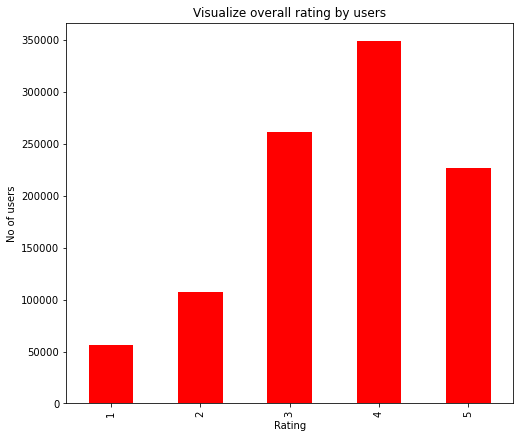

In [20]:
ratings.groupby('Rating')['UserID'].count().plot(kind = 'bar', color = 'red',figsize = (8,7))
plt.xlabel('Rating')
plt.ylabel('No of users')
plt.title('Visualize overall rating by users')
plt.show

In [21]:
#•	Find and visualize the user rating of the movie “Toy Story”

In [27]:
#•	Find and visualize the top 25 movies by viewership rating
ratings.groupby('MovieID')['Rating'].count().sort_values(ascending = False)[:25]

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

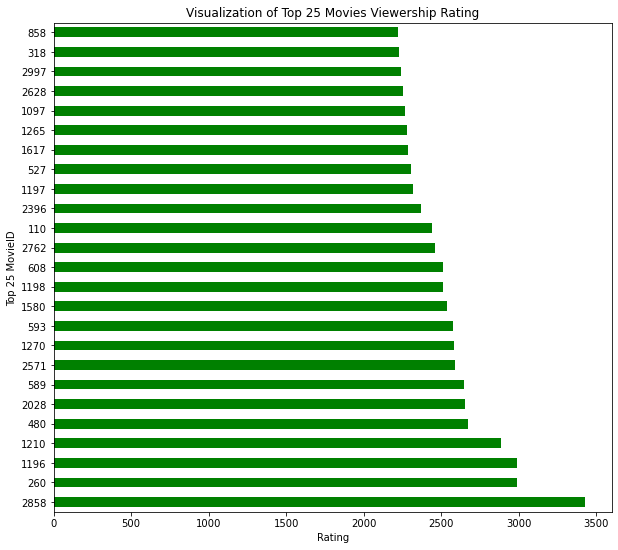

In [28]:
ratings.groupby('MovieID')['Rating'].count().sort_values(ascending = False)[:25].plot(kind ='barh', color = 'g', x = 'Rating', y = 'Number of Users', title = 'User Rating of Toy Story (1995) Movie', figsize = (10,9))
plt.xlabel('Rating')
plt.ylabel('Top 25 MovieID')
plt.title('Visualization of Top 25 Movies Viewership Rating')
plt.show

In [34]:
ratings[ratings.UserID ==2696].groupby('Rating')['MovieID'].count()

Series([], Name: MovieID, dtype: int64)

**	Perform machine learning on first 500 extracted records**

In [36]:
ml_Data = ratings.head(500)
ml_Data

,UserID,MovieID,Rating,Timestamp
0,1,Toy Story (1995),5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
495,6,1296,3,978236519
496,6,838,4,978237444
497,6,1007,3,978238036
498,6,1947,5,978237767


In [37]:
ml_Data = users.head(500)
ml_Data

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
495,496,M,18,4,55455
496,497,F,25,17,55412
497,498,M,35,17,55113
498,499,F,25,1,55108


In [44]:
df = pd.concat([movies, ratings,users], axis=1)
df.head()

,num,title,genre,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,Toy Story (1995),5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455


In [52]:
#user rating of the movie “Toy Story”
df[df.title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count()

Rating
5    1
Name: MovieID, dtype: int64

Text(0.5, 0, 'Ratings')

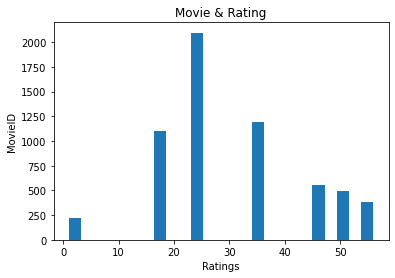

In [56]:
#Create a histogram for movie
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

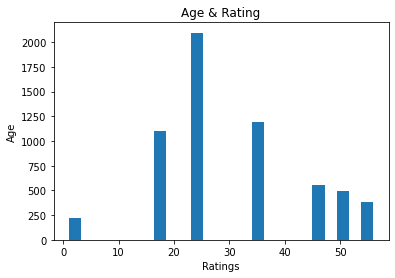

In [54]:
#Create a histogram for age
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

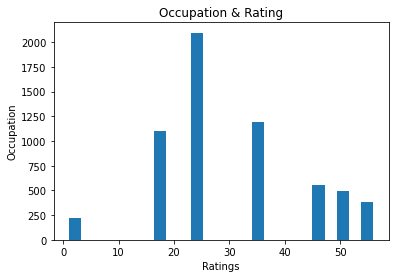

In [55]:
#Create a histogram for occupation
df.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')